## Exploring the Prompts

#### General rules for a Good prompt:

*   A Good prompt should be atleast 3 words long for clear context.The more words you use, the easier it will be for the generator to understand the context of the response you are lookin for.
*   Try to include more **adjectives** in your prompt. **Adjectives** are important in prompt engineering because they infuse feelings into your work, making it more realistic and alive.
*   Prompt expect **particular style** in it. Some popular example are realism, minimalism, surrealism, symmetry, modern, etc.
*   Do not use vulgar or prohibited words in your text prompts to avoid problems.



In [1]:
!pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install diffusers flax jaxlib
!pip install --pre -U xformers
!pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safetensors huggingface-hub
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: jax-cuda12-pjrt
    Found existing installation: jax-cuda12-pjrt 0.4.33
    Uninstalling jax-cuda12-pjrt-0.4.33:
      Successfully uninstalled jax-cuda12-pjrt-0.4.33
  Attempting uninstall: nvidia-cuda-nvcc-cu12
    Found existing installation: nvidia-cuda-nvcc-cu12 12.5.82
    Uninstalling nvidia-cuda-nvcc-cu12-12.5.82:
      Successfully uninstalled nvidia-cuda-nvcc-cu12-12.5.82
  Attempting uninstall: jax-cuda12-plugin
    Found existing installation: jax-cuda12-plugin 0.4.33
    Uninsta

In [2]:
import torch
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
pipeLine = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5',torch_dtype=torch.float16)
pipeLine = pipeLine.to('cuda')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
pipeLine.enable_attention_slicing()
pipeLine.enable_xformers_memory_efficient_attention()

In [5]:
seed = 999
generator = torch.Generator(device='cuda').manual_seed(seed)

> Utils - create single grid with all images

In [6]:
from PIL import Image

def grid_imgs(imgs, rows=1, cols=3, scale=1):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    w, h = int(w*scale), int(h*scale)
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        img = img.resize((w, h), Image.LANCZOS)
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

#### Subject / Object


*   Subject / Object - what you **want to see in the image**.
*   A very common mistake is not writing enough about the subjects, which leaves too much room for imagination like
  * How do you want it to look?
  * Any words to describe more details?
  * Characteristics?
*   We have to name exactly what we want. It has strong effect to control the appearance



  0%|          | 0/50 [00:00<?, ?it/s]

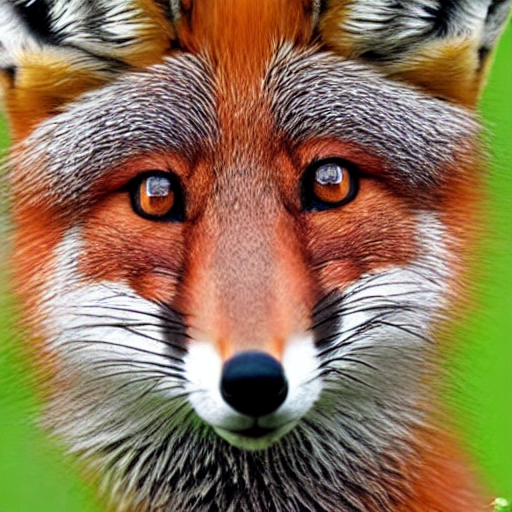

In [7]:
# this prompt will be subjected to change throughout the explanation process
prompt = 'brown fox'
initial_prompt = prompt
img = pipeLine(prompt,generator=generator).images[0]
img

#### Action and Location


*   What the object **needed to be doing**
*   could be behaviour or a place



  0%|          | 0/50 [00:00<?, ?it/s]

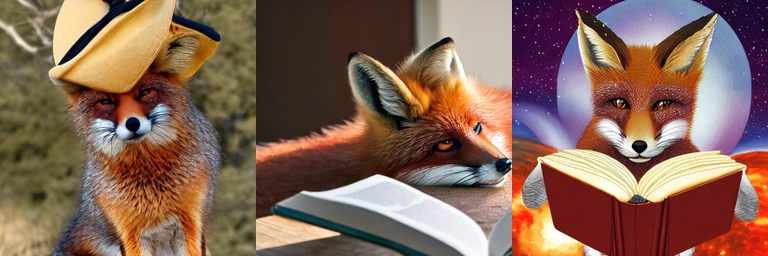

In [8]:
action_prompts = [' wearing a hat', ' reading a book in kitchen', ' reading a book in space']
prompts = [prompt + action_prompt for action_prompt in action_prompts]

imgs = pipeLine(prompts, generator=generator).images
grid_imgs(imgs, cols=len(prompts), scale=0.5)

#### Type


*   It is the material used to make the image or artwork. Eg, Illustration, photography, oil painting, 3D rendering
*   A single keyword can drastically change the style.

##### Useful keywords
> Painting, Photo, Drawing, 3D rendering, etc

> More Specifics: `Oil painting`, `Watercolor painting`, `Portrait`, `Sketch`, `Digital painting`, `Concept art`, `Ultra realistic illustration`, `Underwater portrait`, `Underwater steampunk`, etc



  0%|          | 0/50 [00:00<?, ?it/s]

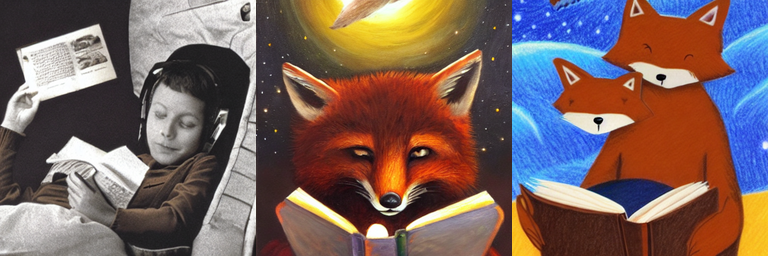

In [9]:
prompt = prompt + action_prompts[2]
type_prompts = ['a photograph of ', 'an oil painting of ', 'a drawing of ']
prompts = [type_prompt + prompt for type_prompt in type_prompts]

imgs = pipeLine(prompts, generator=generator).images
grid_imgs(imgs, cols=len(prompts), scale=0.5)

#### Style


*   It is the **artistic style** of the image. Eg, `pop art`, `surrealist`
*   Sometimes you dont notice much difference if you add more specific items. This can especially happen in cases where the effect of the keywords used was alreadyimplied by the previously used terms, such as the type or artist name

##### Useful Keywords
> `realistic`,`hyperrealistic`,`pop-art`, `modernist`, `art nouveau`, `surrealist`, etc



  0%|          | 0/50 [00:00<?, ?it/s]

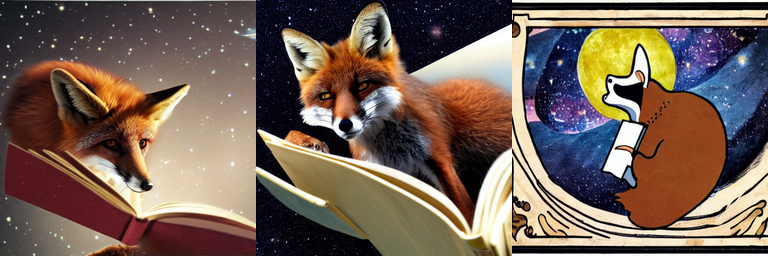

In [15]:
prompt = type_prompts[0] + prompt
style_prompts = [', Modernist',', Realistic',', art nouveau']
prompts = [prompt + style_prompt for style_prompt in style_prompts]

imgs = pipeLine(prompts, generator=generator).images
grid_imgs(imgs, cols=len(prompts), scale=0.5)

#### Colors


*   You can control overall color of the image by adding color or hue keyword

##### Useful keywords
> `vivid`, `tones` or `colors`, `bw` (`black and white`), `gold`, `silver`, etc



  0%|          | 0/50 [00:00<?, ?it/s]

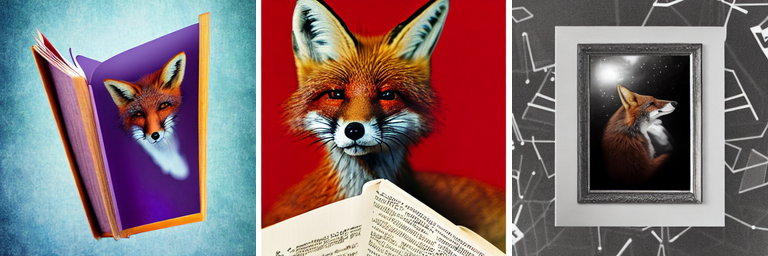

In [16]:
prompt = prompt + style_prompts[1]
color_prompts = [', purple',', red colors',', black and white']
prompts = [prompt + color_prompt for color_prompt in color_prompts]

imgs = pipeLine(prompts, generator=generator).images
grid_imgs(imgs, cols=len(prompts), scale=0.5)

#### Artist
> Adding the name of well-known artists can strongly influence the image. It allows you to use the style of a specific artist.


*   It's also possible to to use multiple artist names to mix their style.
*   Do not need to add word by word. Just `by` or `painted by`

##### Useful Keywords
> `Van Gogh`, `John Collier`, `Monet`, `Alphonse Mucha`, `Salvador Dali`, `Rembrandt`, `Da Vinci`, etc

  0%|          | 0/50 [00:00<?, ?it/s]

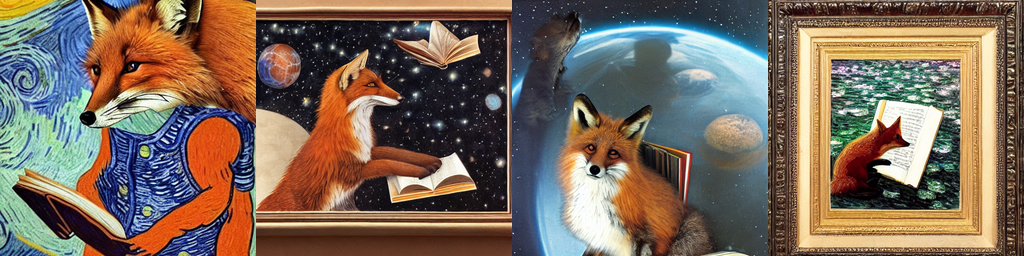

In [17]:
artist_prompts = ['by Van Gogh', 'by Sandro Botticelli', 'by John Collier', 'painted by Monet']
prompts = [prompt +" "+ artist_prompt for artist_prompt in artist_prompts]

imgs = pipeLine(prompts, generator=generator).images
grid_imgs(imgs, cols=len(prompts), scale=0.5)

#### Resolution


*   It represents how sharp and detailed the image will be.



  0%|          | 0/50 [00:00<?, ?it/s]

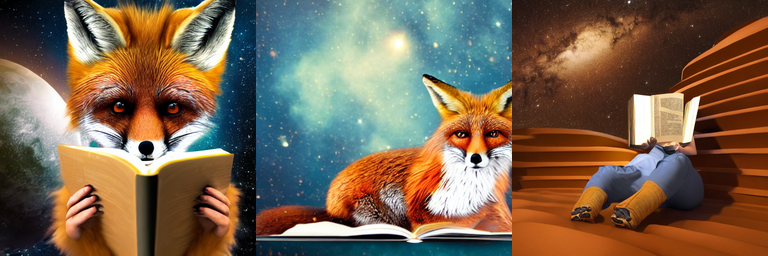

In [18]:
res_prompts = [', unreal engine', ', sharp focus', ', vray']
prompts = [prompt + res_prompt for res_prompt in res_prompts]

imgs = pipeLine(prompts, generator=generator).images
grid_imgs(imgs, cols=len(prompts), scale=0.5)

#### Other Attributes
> Examples - `feelings`, `more details`, etc

*   Tends to increase emotional expressiveness on the subject



  0%|          | 0/50 [00:00<?, ?it/s]

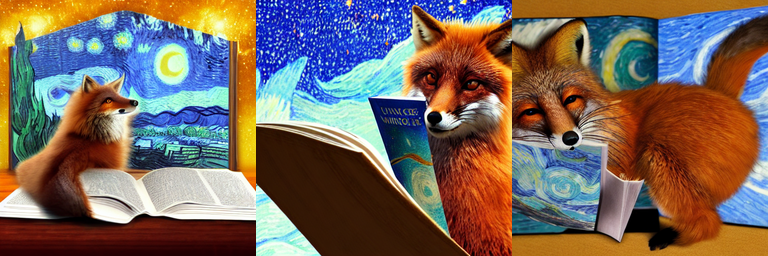

In [19]:
prompt = prompt + artist_prompts[0] +res_prompts[0]
other_prompts = ['sad ', 'quick ', 'bushy tail ']
prompts = [prompt.replace(initial_prompt, other_prompt + initial_prompt) for other_prompt in other_prompts]

imgs = pipeLine(prompts, generator=generator).images
grid_imgs(imgs, cols=len(prompts), scale=0.5)

#### Conclusion
* After a detailed process through refining the prompt we will have all the explained parameters and attributes in result prompt below

In [21]:
prompt = prompt.replace(initial_prompt, other_prompts[1] + initial_prompt)
prompt

'a photograph of quick brown fox reading a book in space, Realistic, Realisticby Van Gogh, unreal engine'

##### **Comments**


*   Some objectives can be easily achieved with very less prompt details
*   Result could not be similar to the expectation
*   CLIP can handle 77 tokens
*   Result does not depend on prompt but also on the parameters

